In [1]:
import re
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import emoji
import jaconv


In [2]:
cd ../

C:\Users\akite\OneDrive\デスクトップ\source code\twitter-compe


In [3]:
df = pd.read_csv("./arranged_data/wakati.csv")

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20285 entries, 0 to 20284
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      20285 non-null  int64  
 1   Unnamed: 0.1    20285 non-null  int64  
 2   Unnamed: 0.1.1  20285 non-null  int64  
 3   id              20285 non-null  int64  
 4   flg             20285 non-null  int64  
 5   keyword         20285 non-null  object 
 6   location        11806 non-null  object 
 7   text            20285 non-null  object 
 8   is_url          20285 non-null  bool   
 9   is_location     20285 non-null  bool   
 10  num_emoji       20285 non-null  float64
 11  num_reply       20285 non-null  int64  
 12  num_hash        20285 non-null  int64  
 13  text_length     20285 non-null  float64
 14  text_wakati     20285 non-null  object 
dtypes: bool(2), float64(2), int64(7), object(4)
memory usage: 2.1+ MB


In [5]:
# 特徴量の加工
X_df = df[["is_url","is_location","num_emoji","num_reply","num_hash","text_length"]]
X_df["is_url"] = (X_df["is_url"]*1).astype(np.float64)
X_df["is_location"] = (X_df["is_location"]*1).astype(np.float64)
X_df["num_emoji"] = X_df["num_emoji"].astype(np.float64)
X_df["num_reply"] = X_df["num_reply"].astype(np.float64)
X_df["num_hash"] = X_df["num_hash"].astype(np.float64)
X_df["text_length"] = X_df["text_length"].astype(np.float64)
print(X_df.info())
X= X_df.values
# 目標値の加工
Y_df = df["flg"].astype(np.int64)
y = Y_df.values
#トレーニングデータとテストデータへの分割
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.5, random_state=1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20285 entries, 0 to 20284
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   is_url       20285 non-null  float64
 1   is_location  20285 non-null  float64
 2   num_emoji    20285 non-null  float64
 3   num_reply    20285 non-null  float64
 4   num_hash     20285 non-null  float64
 5   text_length  20285 non-null  float64
dtypes: float64(6)
memory usage: 951.0 KB
None


c:\users\akite\onedrive\デスクトップ\source code\twitter-compe\venv\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
c:\users\akite\onedrive\デスクトップ\source code\twitter-compe\venv\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
c:\users\akite\onedrive\デスクトップ\source code\twitter-compe\venv\lib\site-packages\ipykernel_la

In [6]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [20]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score ,precision_score, recall_score
import seaborn as sns
def result_heatmap(Y_test,Y_pred):
    print("正解率:"+str(accuracy_score(Y_test, Y_pred)))
    print("適合率:"+str(precision_score(Y_test,Y_pred)))
    print("再現率:"+str(recall_score(Y_test,Y_pred)))
    cm = confusion_matrix(Y_test, Y_pred)
    sns.heatmap(cm,annot=True, cmap='Blues')

正解率:0.9293108547766933
適合率:0.0
再現率:0.0


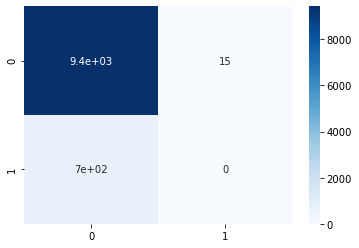

In [21]:
#普通にやると全部違う方に分類される
y_pred = lr.predict(X_test)
result_heatmap(y_test,y_pred)

正解率:0.9322685595977521
適合率:0.5517241379310345
再現率:0.11396011396011396


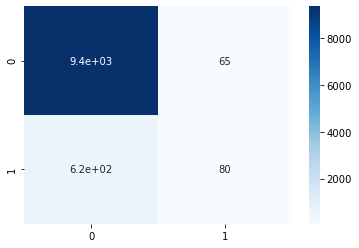

In [25]:
y_pred = (lr.predict_proba(X_test)[:, 1] > 0.3).astype(int)
result_heatmap(y_test,y_pred)

In [28]:
plot_df = pd.DataFrame()
plot_df["threshold"]= np.arange(0.1,0.4,0.01)
plot_df["precision"] = np.zeros(plot_df.shape[0])
plot_df["recall"] = np.zeros(plot_df.shape[0])

for idx in range(plot_df.shape[0]):
    y_pred = (lr.predict_proba(X_test)[:, 1] > plot_df["theshold"][idx]).astype(int)
    precision_value.append(precision_score(Y_test,Y_pred))
    recall_value.appned(recall_score(Y_test,Y_pred))
sns.lineplot()

TypeError: 'numpy.ndarray' object is not callable